In [2]:
from get_true_bvs import *
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from scipy.stats import linregress
import matplotlib.patches as patches

In [3]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = [3, 3]
plt.rcParams['font.size'] = 12

In [4]:
bvs = get_true_bvs(init_in_reg=True)
bvs = get_non_tcs(bvs, False)

622 init in reg
613 tracks not TCs


In [5]:
years = np.array([ bv.track_times[0].year for bv in bvs ])

In [6]:
year, index, counts = np.unique(years,  return_index = True, return_counts=True)

LinregressResult(slope=-0.3926470588235294, intercept=806.05, rvalue=-0.38647990543021277, pvalue=0.1392225188522518, stderr=0.25042783460713935, intercept_stderr=504.4881936362657)


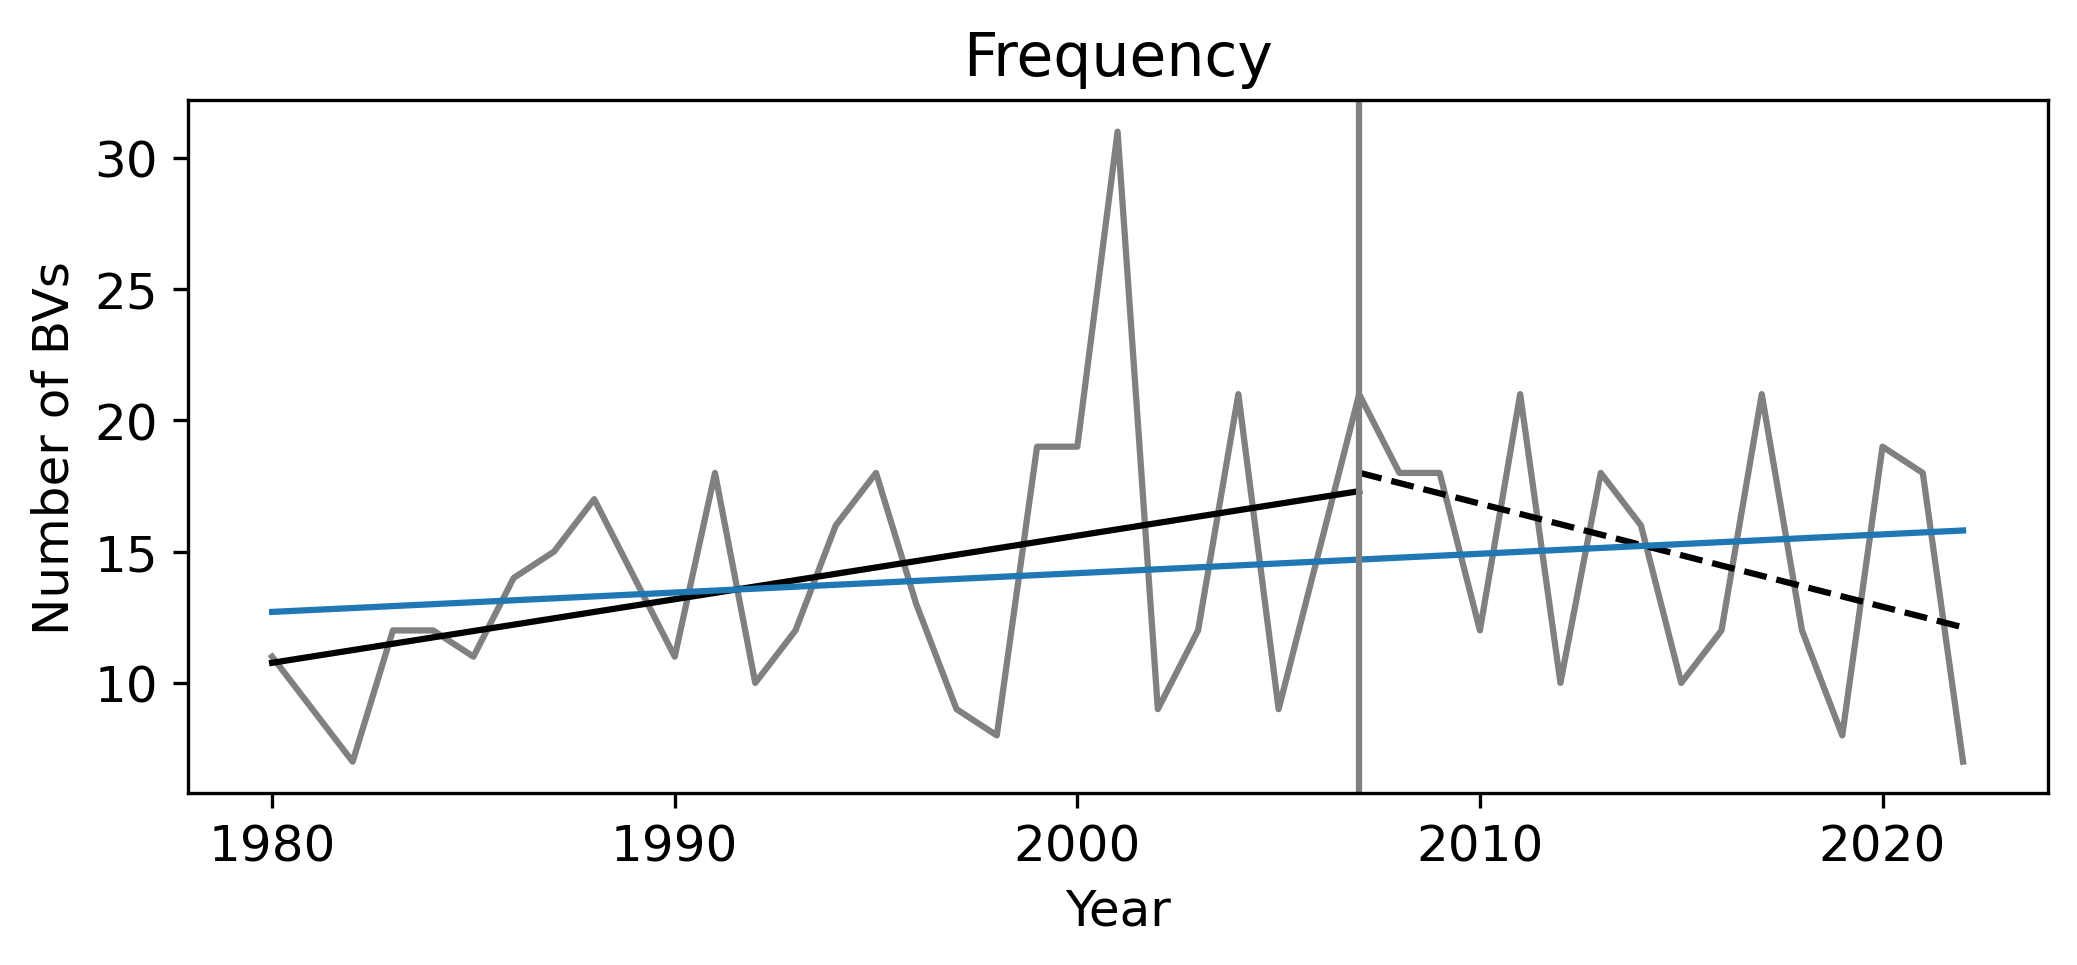

In [7]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set(xlabel='Year', ylabel='Number of BVs', title='Frequency')
ax.plot(year, counts, color='grey')

coef = np.polyfit(year[:28],  counts[:28],1)
p = np.poly1d(coef)
ax.plot(year[:28], p(year[:28]),linestyle='-', color ='black')

coef = np.polyfit(year[27:],  counts[27:],1)
p = np.poly1d(coef)
ax.plot(year[27:], p(year[27:]), color='black', linestyle='--')
ax.axvline(x = 2007, color = 'grey', linewidth=1)

coef = np.polyfit(year, counts,1)
p = np.poly1d(coef)
ax.plot(year, p(year))
ax.axvline(x = 2007, color = 'grey')

print(linregress(year[27:], counts[27:]))

plt.savefig('plots/frequencytrend2')

In [9]:
vorticity = []
latitude = []
longitude = []

for n in range(0,613):
    vort = np.mean(bvs[n].vort_data[2])
    vorticity.append(vort)
    
    lon = np.mean(bvs[n].vort_data[0])
    longitude.append(lon)
    
    lat = np.mean(bvs[n].vort_data[1])
    latitude.append(lat)

In [10]:
yearlyvort = []
yearlylon = []
yearlylat = []

current_index = 0

for length in counts:
    
    yearlyvort.append(np.mean(vorticity[current_index:current_index + length]))
    yearlylon.append(np.mean(longitude[current_index:current_index + length]))
    yearlylat.append(np.mean(latitude[current_index:current_index + length]))
        
    current_index += length

LinregressResult(slope=-0.014240168388534915, intercept=32.11381606948028, rvalue=-0.3277291784890274, pvalue=0.21528766618120818, stderr=0.010971420951946843, intercept_stderr=22.101985373765427)


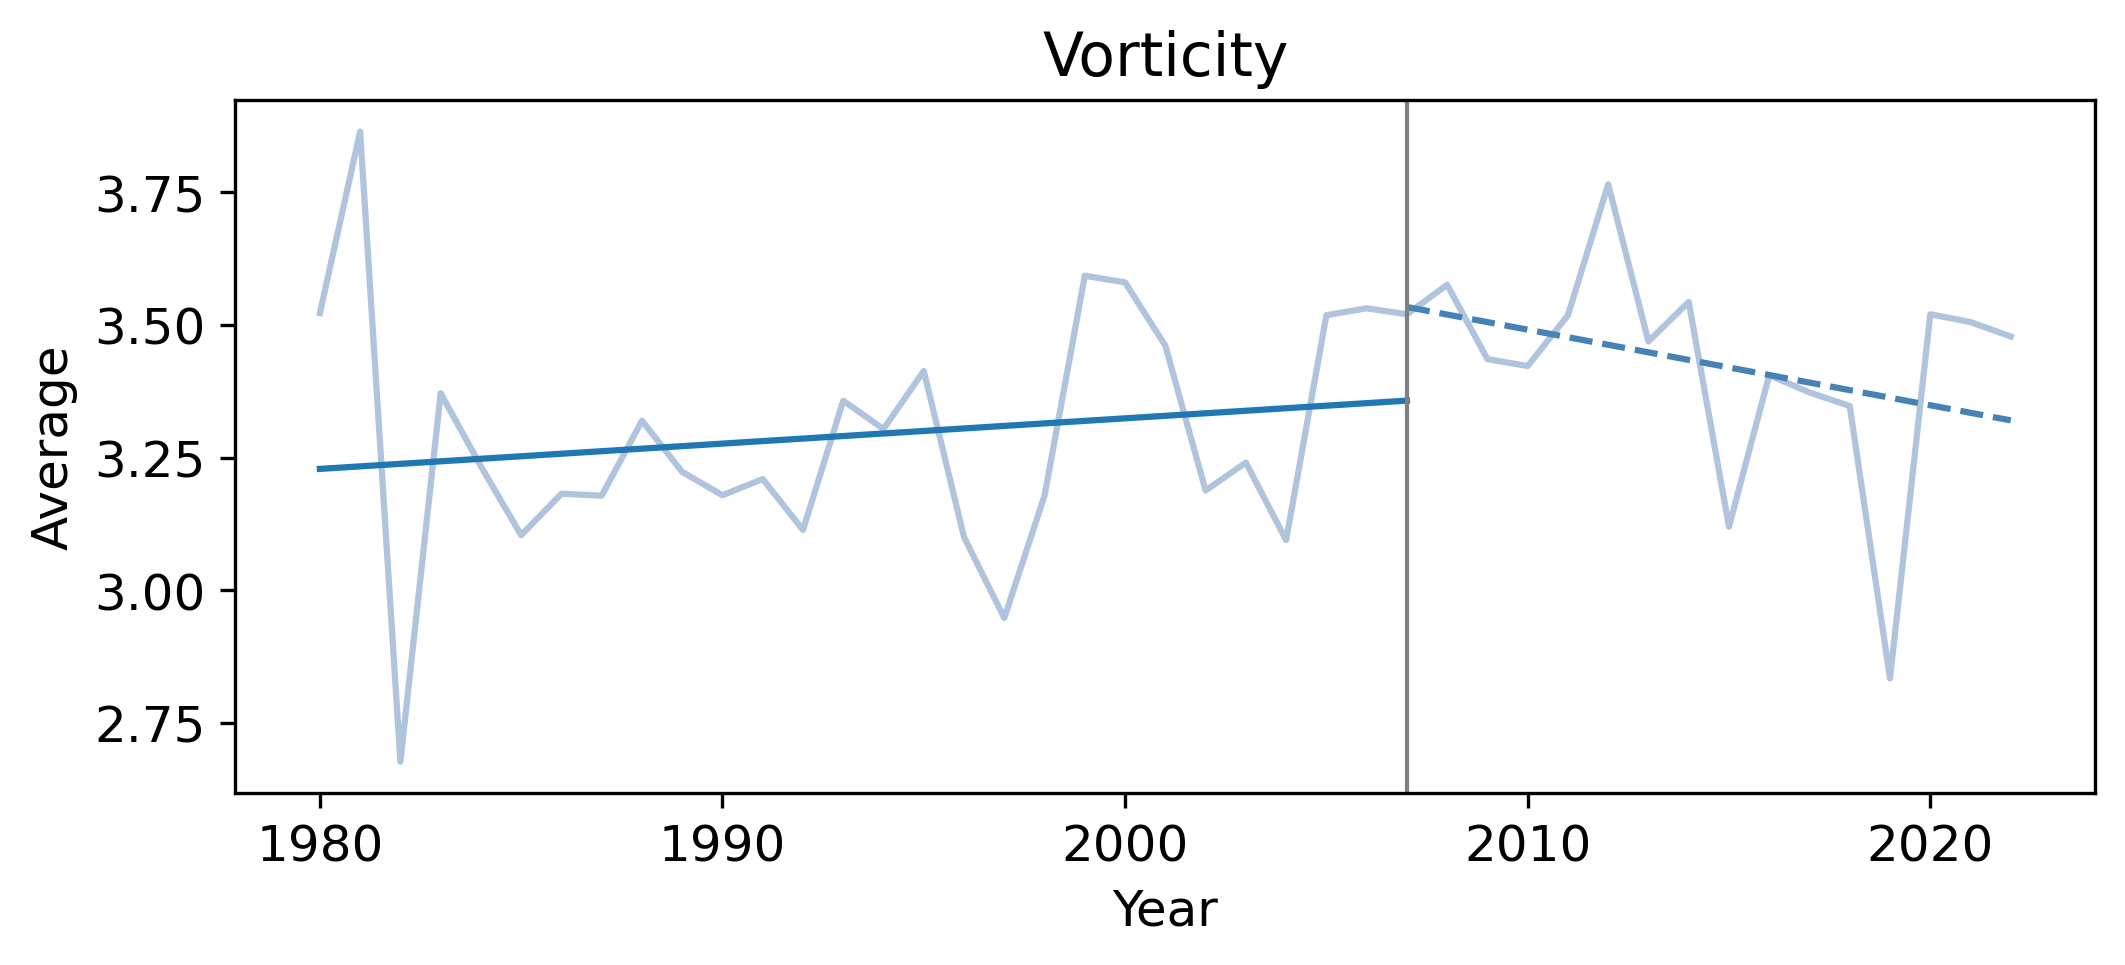

In [18]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set(xlabel='Year', ylabel='Average', title='Vorticity')
ax.plot(year, yearlyvort, color='lightsteelblue')

coef = np.polyfit(year[:28], yearlyvort[:28],1)
p = np.poly1d(coef)
ax.plot(year[:28], p(year[:28]), linestyle ='-')

coef = np.polyfit(year[27:], yearlyvort[27:],1)
p = np.poly1d(coef)
ax.plot(year[27:], p(year[27:]), linestyle ='--', color = 'steelblue')

ax.axvline(x = 2007, color = 'grey',linewidth=1)
print(linregress((year[27:], yearlyvort[27:])))

LinregressResult(slope=0.04257830698030534, intercept=-81.25143680225374, rvalue=0.34627017419666345, pvalue=0.07106511031373795, stderr=0.022623088343043808, intercept_stderr=45.099496852754534)


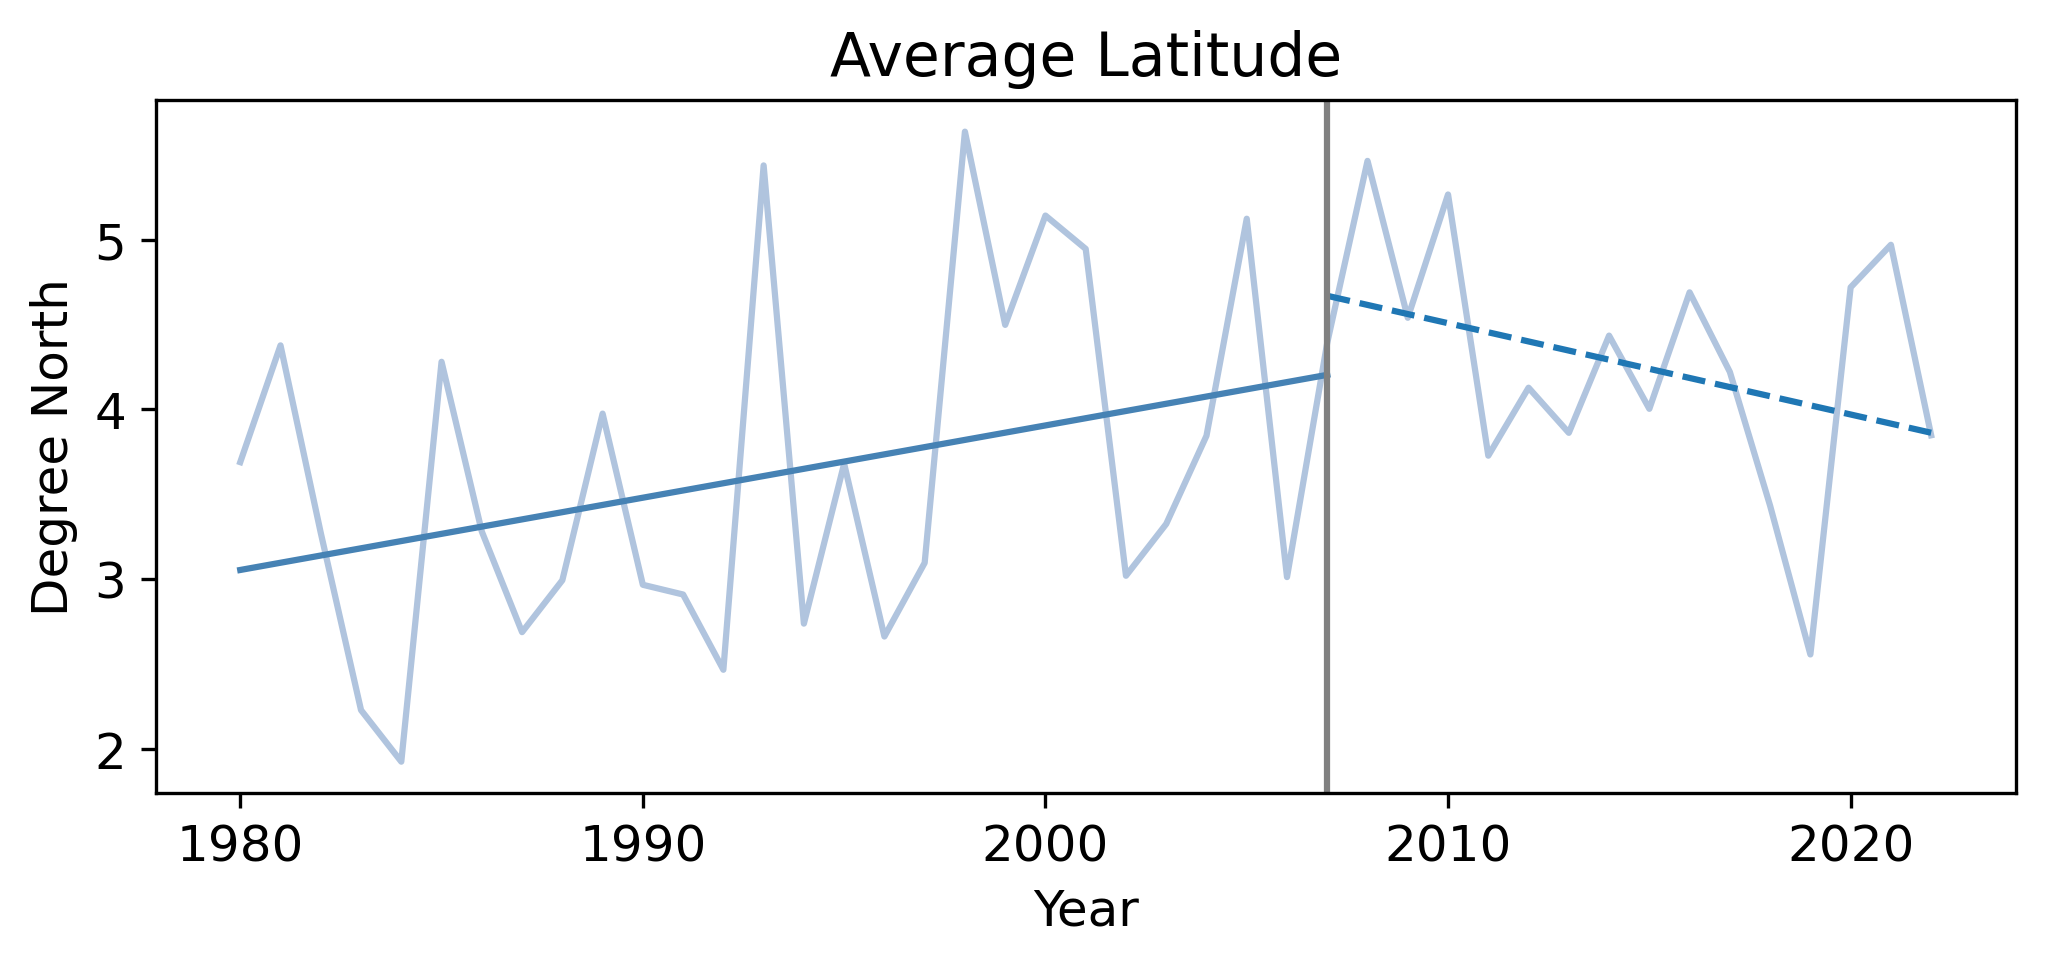

In [17]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set(xlabel='Year', ylabel='Degree North', title='Average Latitude')
ax.plot(year, yearlylat, color='lightsteelblue')

coef = np.polyfit(year[:28], yearlylat[:28],1)
p = np.poly1d(coef)
ax.plot(year[:28], p(year[:28]), linestyle ='-', color='steelblue')

coef = np.polyfit(year[27:], yearlylat[27:],1)
p = np.poly1d(coef)
ax.plot(year[27:], p(year[27:]), linestyle ='--')
print(linregress((year[:28], yearlylat[:28])))


ax.axvline(x = 2007, color = 'grey')

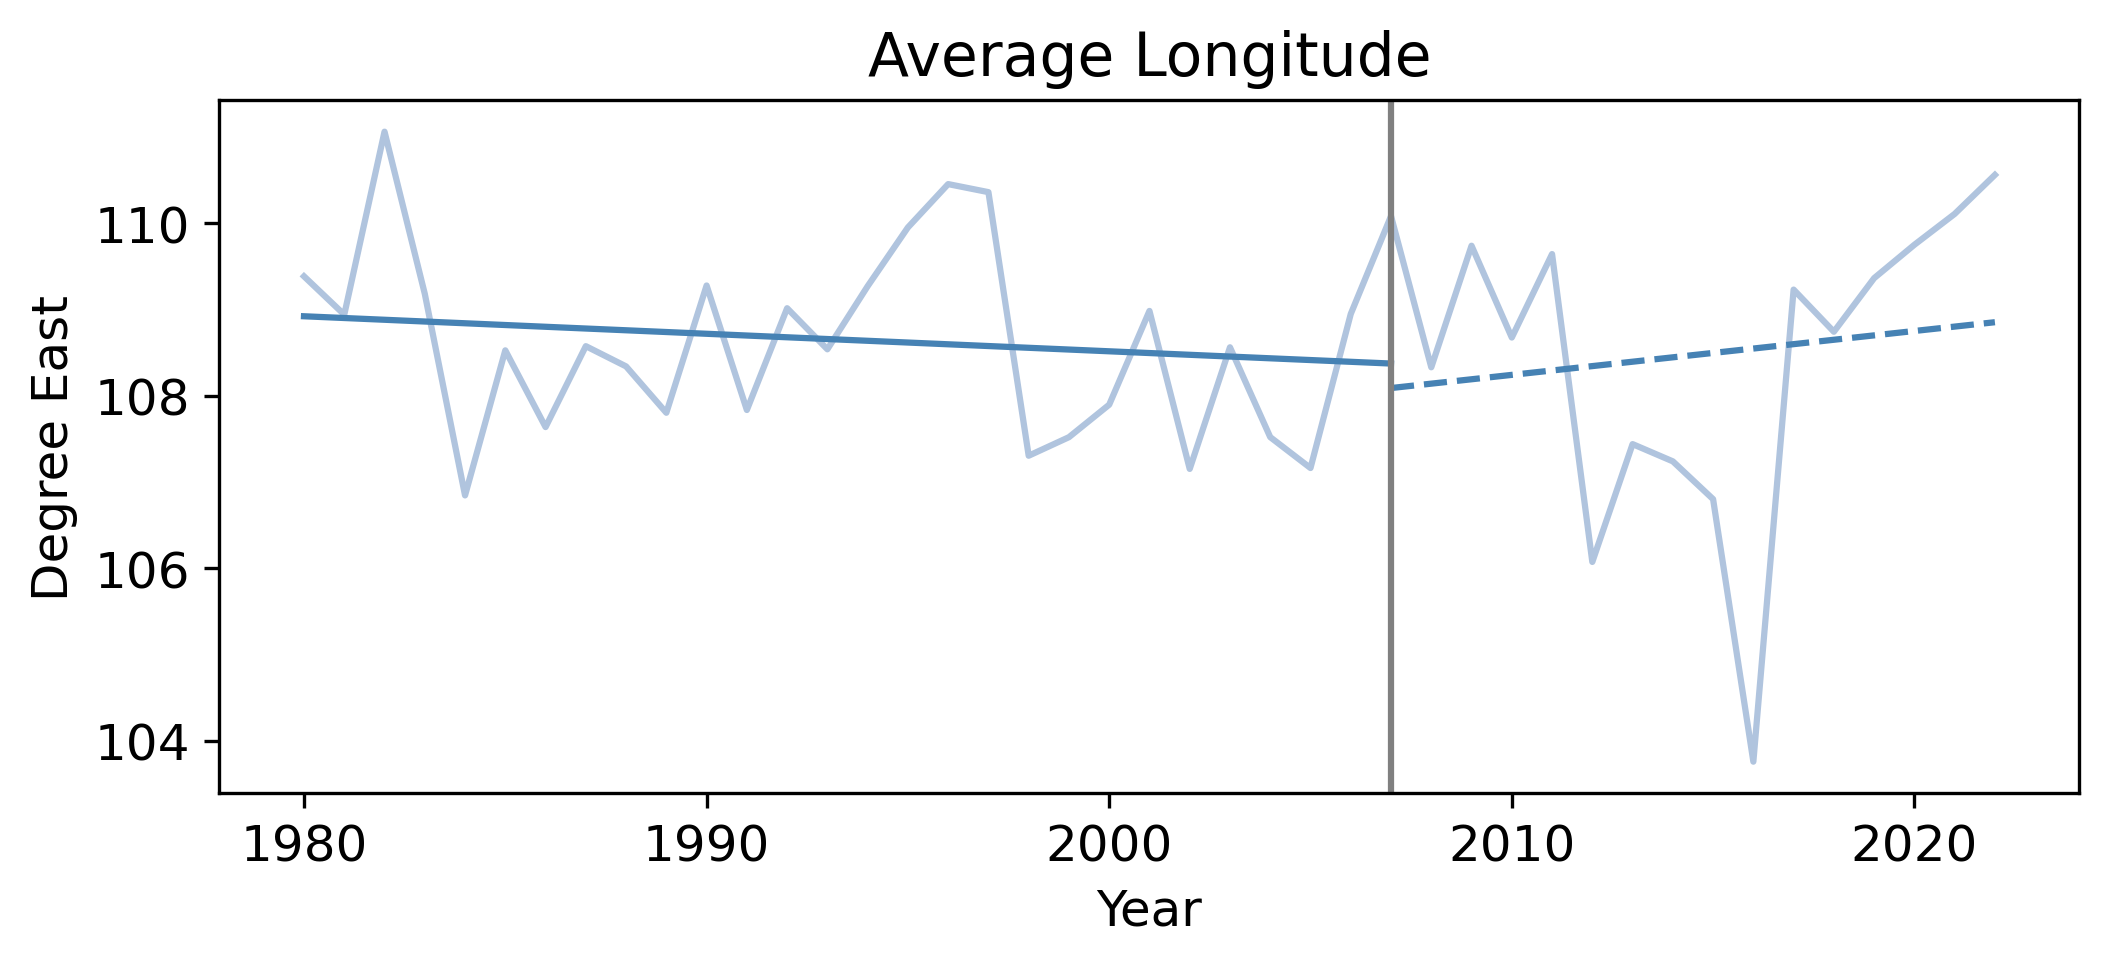

In [13]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set(xlabel='Year', ylabel='Degree East', title='Average Longitude')
ax.plot(year, yearlylon, color='lightsteelblue')

coef = np.polyfit(year[:28], yearlylon[:28],1)
p = np.poly1d(coef)
ax.plot(year[:28], p(year[:28]), color='steelblue')

coef = np.polyfit(year[27:], yearlylon[27:],1)
p = np.poly1d(coef)
ax.plot(year[27:], p(year[27:]), linestyle ='--', color='steelblue')

ax.axvline(x = 2007, color = 'grey')

In [14]:
latitude = np.array(latitude)
longitude = np.array(longitude)

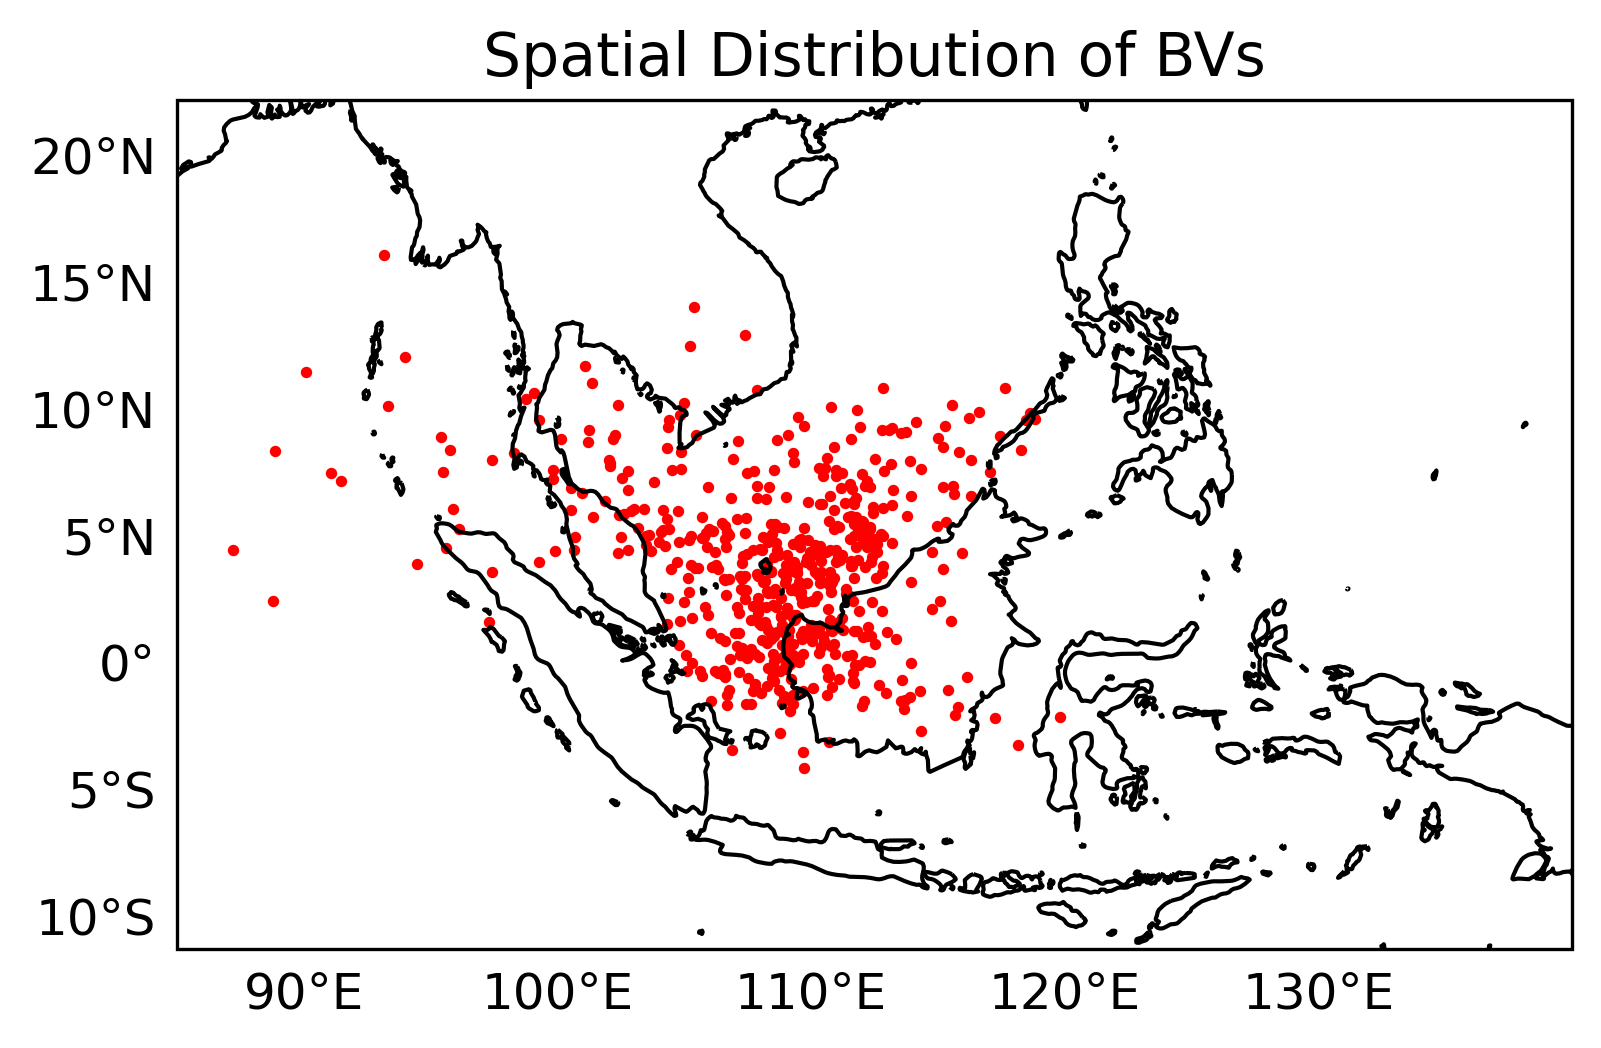

In [16]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([85,140, -10, 20])
ax.coastlines()
ax.set_title('Spatial Distribution of BVs')

gl = ax.gridlines(draw_labels=True, linewidth= 0)
gl.top_labels = False
gl.right_labels = False
ax.set_extent([85,140, -10, 20])
ax.set_xlabel('Longitude')
ax.scatter(longitude[0:121],latitude[0:121], s = 3 , color = 'red') #1980 – 1989
ax.scatter(longitude[122:255],latitude[122:255], s = 3 , color = 'red') #1990 – 1999
ax.scatter(longitude[256:428],latitude[256:428],  s = 3 , color = 'red') #2000 – 2009
ax.scatter(longitude[429:560],latitude[429:560], s = 3, color = 'red' ) #2010 – 2022